In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'/kaggle/input/breastcancerdataset/breast-cancer.csv')

In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

<AxesSubplot:>

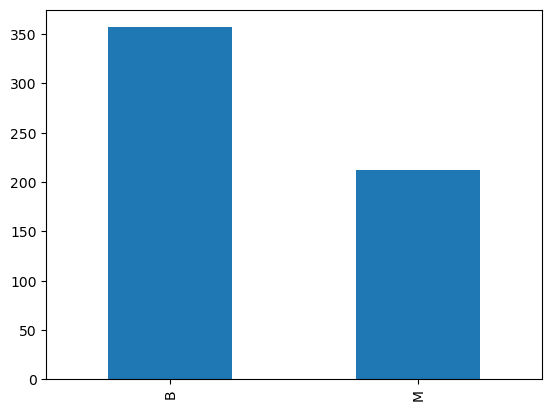

In [7]:
df.diagnosis.value_counts().plot(kind="bar")

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

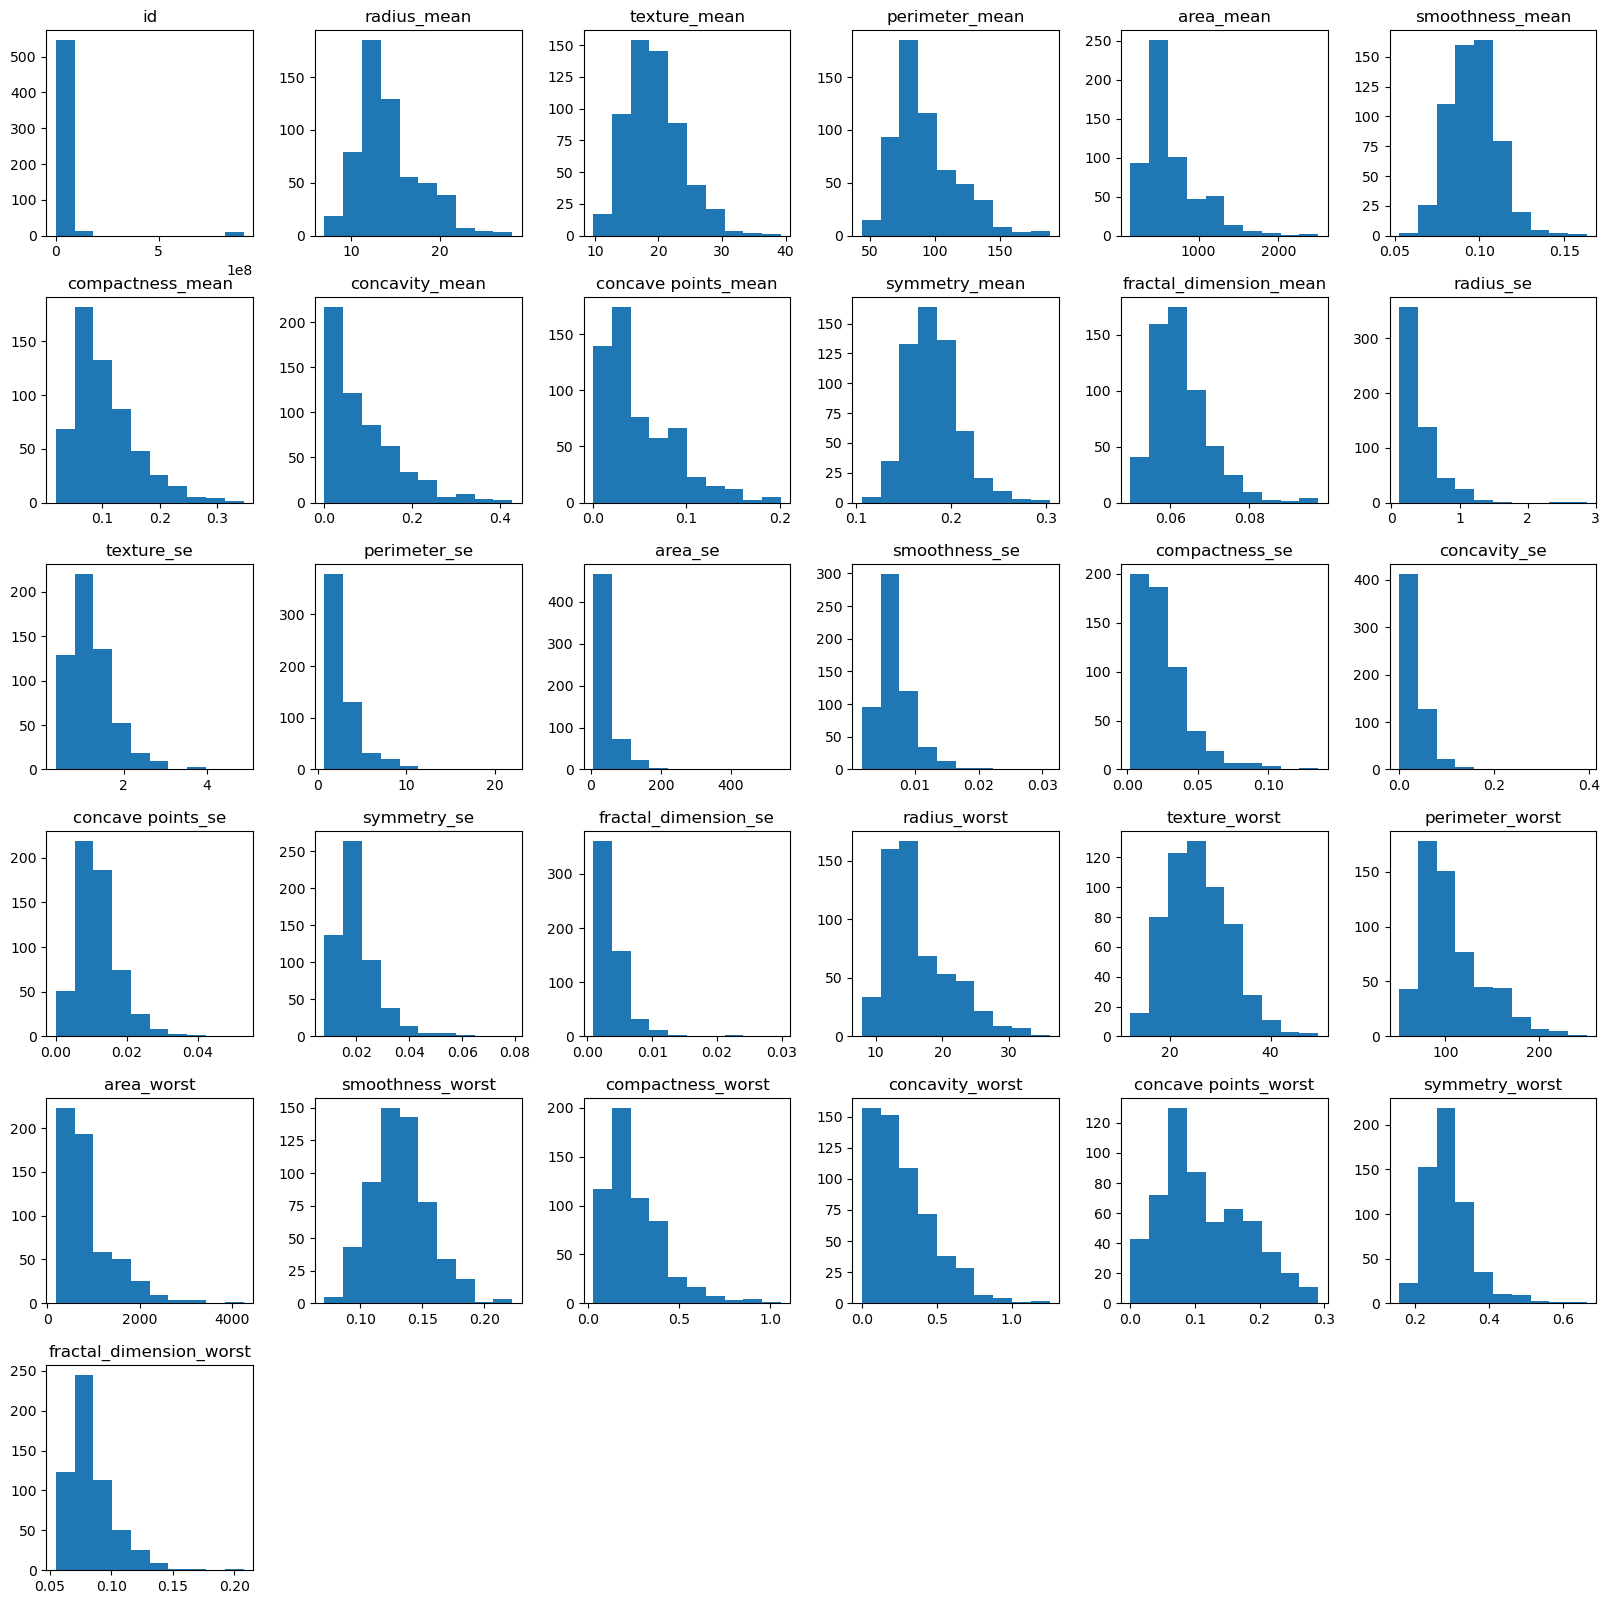

In [9]:
df.hist(bins=10,figsize=(20,20),grid=False)

In [13]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [17]:
X = df.drop('diagnosis', axis=1)  # Features (excluding 'diagnosis')
y = df['diagnosis']  # Target variable ('diagnosis')

In [21]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 31)
X_test shape: (114, 31)
y_train shape: (455,)
y_test shape: (114,)


In [23]:
# Preprocessing: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)

In [25]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [26]:
# Model evaluation
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logistic_pred))
print("Classification Report:\n", classification_report(y_test, logistic_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, logistic_pred))

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_pred))

Logistic Regression Metrics:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9697019325253848

Random Forest Metrics:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.9580740255486406


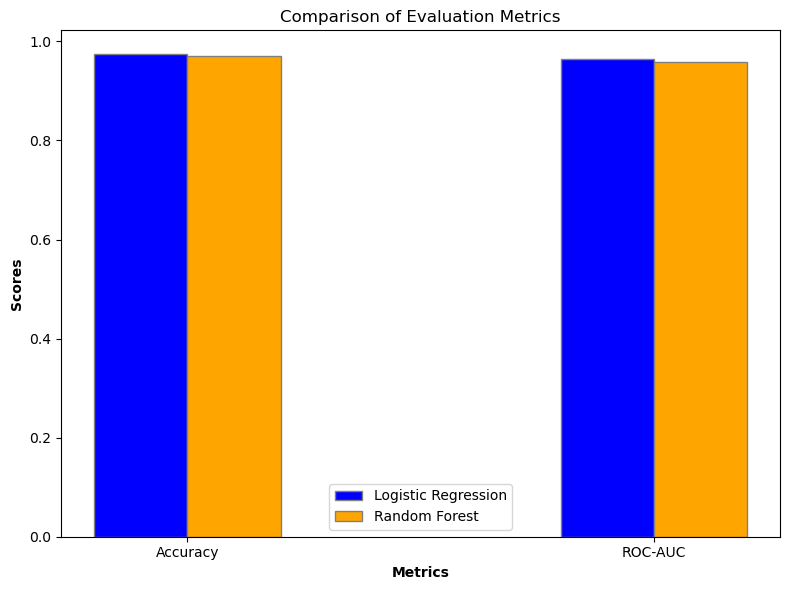

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have evaluation metrics for Logistic Regression and Random Forest
# Replace these values with your actual evaluation metric values
logistic_accuracy =accuracy_score(y_test, logistic_pred)
logistic_roc_auc =accuracy_score(y_test, rf_pred)
rf_accuracy = roc_auc_score(y_test, logistic_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

# Metrics and models names
metrics = ['Accuracy', 'ROC-AUC']
models = ['Logistic Regression', 'Random Forest']

# Evaluation metric scores for both models
logistic_scores = [logistic_accuracy, logistic_roc_auc]
rf_scores = [rf_accuracy, rf_roc_auc]

# Setting the width of the bars
bar_width = 0.20

# Creating positions for bars on X-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(r1, logistic_scores, color='blue', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, rf_scores, color='orange', width=bar_width, edgecolor='grey', label='Random Forest')

# Adding labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(metrics))], metrics)
plt.title('Comparison of Evaluation Metrics')

# Adding legend and showing the plot
plt.legend()
plt.tight_layout()
plt.show()


***This notebook is created by Charubala RS***